### GRU Model Training

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
X = np.load('C:/Users/harit/OneDrive/Desktop/info project/rolling_window_sequences.npy')
metadata = pd.read_csv('C:/Users/harit/OneDrive/Desktop/prognosAI-Infosys-intern-project/milestone_2/week_3/Day_11/sequence_metadata_with_RUL.csv')
y = metadata['RUL']
print('Features Shape: ',X.shape)
print('Target Shape: ', y.shape)

Features Shape:  (152559, 30, 66)
Target Shape:  (152559,)


In [3]:
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Define GRU model creation function
def create_gru_model(input_shape, units=64, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(GRU(units, input_shape=input_shape))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

In [14]:
# Create the model
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]), units=64, learning_rate=0.001, dropout_rate=0.2)

# callbacks for early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

c:\Users\harit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 20758.9551 - mae: 115.2021 - val_loss: 12829.4014 - val_mae: 87.6886
Epoch 2/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - loss: 9823.7686 - mae: 76.0931 - val_loss: 6733.4160 - val_mae: 59.5840
Epoch 3/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - loss: 5355.3911 - mae: 53.2956 - val_loss: 4277.7178 - val_mae: 47.1838
Epoch 4/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - loss: 4062.9146 - mae: 46.9789 - val_loss: 3793.1760 - val_mae: 46.1724
Epoch 5/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - loss: 3697.4268 - mae: 45.3571 - val_loss: 3445.0530 - val_mae: 44.1713
Epoch 6/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - loss: 3524.3706 - mae: 44.3813 - val_loss: 3584.3318 - val_mae: 45.5204
Epoch 7/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - loss: 3383.3555 - mae: 43.5480 - val_loss: 3265.3572 - val_mae: 43.7107
Epoch 8/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 92s 36ms/step - loss: 3257.6506 - mae: 42.735

In [16]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}')

# Predict on test set
y_pred = model.predict(X_val).flatten()

# Calculate test MSE
test_mse = mean_squared_error(y_val, y_pred)
print(f'Test MSE: {test_mse:.4f}')

Validation MSE: 1668.7766, MAE: 30.0115
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Test MSE: 1668.7757


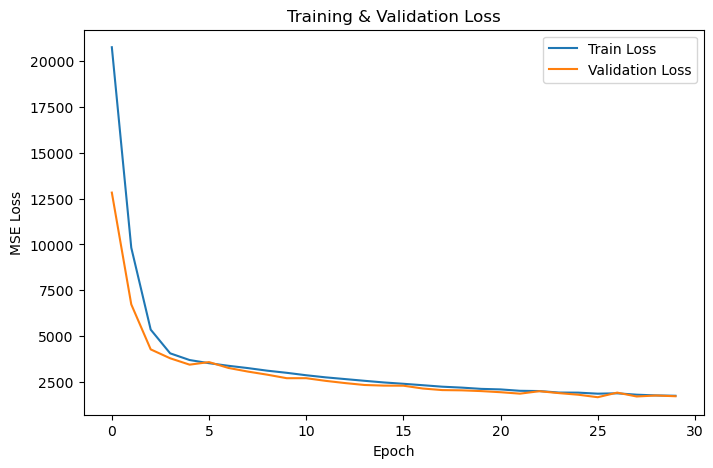

In [17]:
# Training and Validation Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

## Observations

In [ ]:
We have loaded the data and split it into training and testing datasets.
Created a GRU neural network model for time series or sequential data prediction, compiles it, and sets up an early stopping mechanism during training.
The epochs shows both training and validation loss/MAE decrease consistently over epochs.
The values of Validation MSE: 1668.7766, MAE: 30.0115.
Plotted the graph to see validation and training loss.The model likely reached its best performance around the final few epochs. 